In [7]:
from automated_underwater_area_estimation.segmentation.reefsupport.model import ReefSupportModel
from automated_underwater_area_estimation.segmentation.epfl.model import EPFLModel
from automated_underwater_area_estimation.segmentation.segmentation_dataset import CoralSegmentationDataset
from automated_underwater_area_estimation.segmentation.utils import plot_segmentation_results
from automated_underwater_area_estimation.segmentation.evaluation_metrics import compute_segmentation_metrics

In [8]:
all_models = []
for model_name in ["yolov8_sm_latest.pt", "yolov8_xlarge_latest.pt"]:
    all_models.append(ReefSupportModel(model_name))

for model_name in ["EPFL-ECEO/segformer-b2-finetuned-coralscapes-1024-1024", "EPFL-ECEO/segformer-b5-finetuned-coralscapes-1024-1024"]:
    all_models.append(EPFLModel(model_name))

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
dataset = CoralSegmentationDataset("./automated_underwater_area_estimation/data_preprocessed/coralscop/test")

ReefSupportModel(model_name=yolov8_sm_latest.pt)

0: 704x1024 15 hard_corals, 1 soft_coral, 26.0ms
Speed: 3.3ms preprocess, 26.0ms inference, 6.4ms postprocess per image at shape (1, 3, 704, 1024)


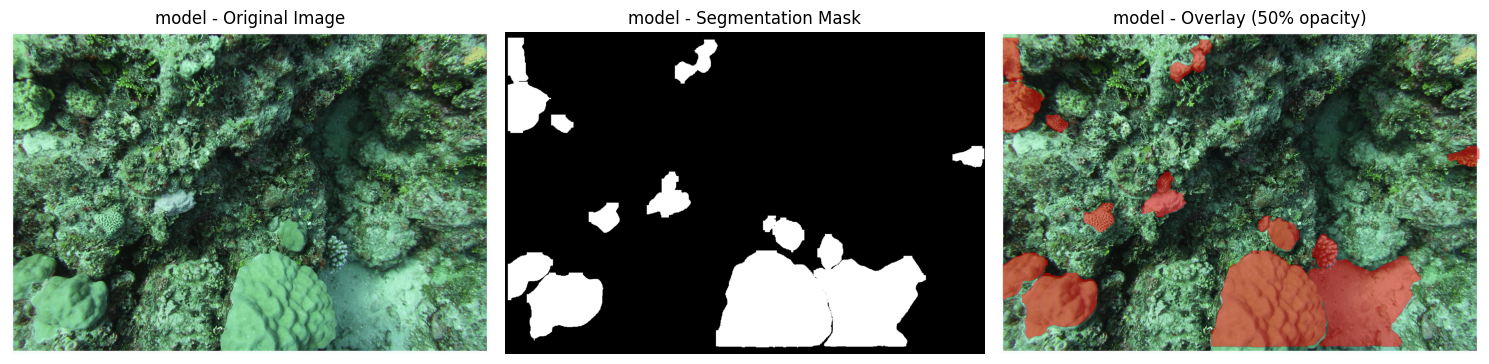

{'dice': 0.7518490552902222, 'iou': 0.6023703217506409, 'precision': 0.630658745765686, 'recall': 0.9306959509849548, 'pixel_accuracy': 0.9254069924354553}
ReefSupportModel(model_name=yolov8_xlarge_latest.pt)

0: 704x1024 10 hard_corals, 171.8ms
Speed: 3.7ms preprocess, 171.8ms inference, 1248.7ms postprocess per image at shape (1, 3, 704, 1024)


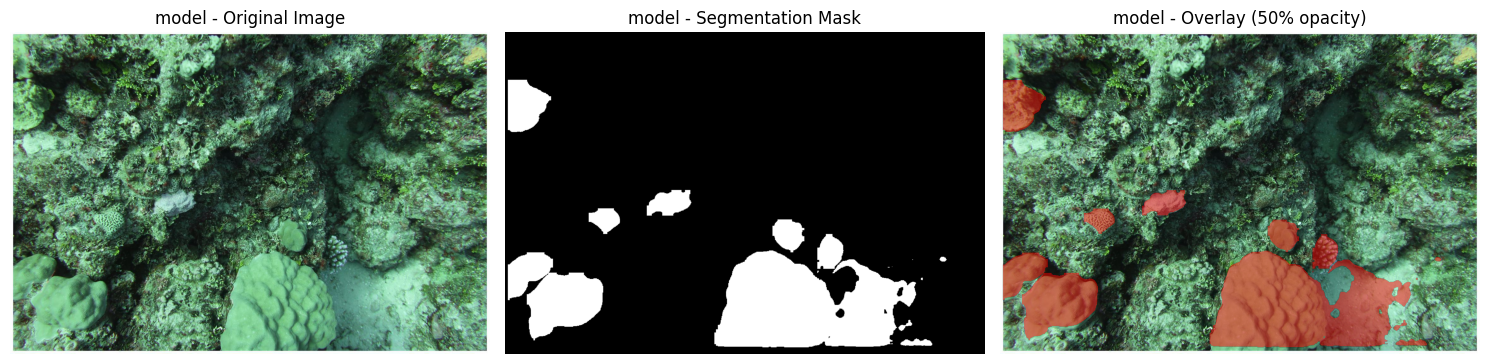

{'dice': 0.7731689214706421, 'iou': 0.6302163004875183, 'precision': 0.7012856602668762, 'recall': 0.8614715933799744, 'pixel_accuracy': 0.9386274218559265}
EPFLModel(model_name=EPFL-ECEO/segformer-b2-finetuned-coralscapes-1024-1024)


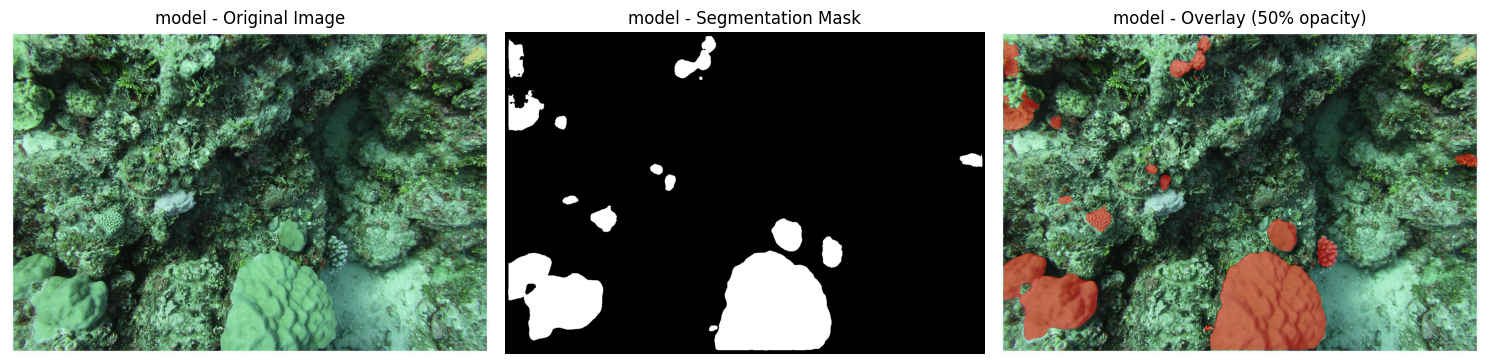

{'dice': 0.922863781452179, 'iou': 0.8567753434181213, 'precision': 0.9293968677520752, 'recall': 0.9164218306541443, 'pixel_accuracy': 0.981399655342102}
EPFLModel(model_name=EPFL-ECEO/segformer-b5-finetuned-coralscapes-1024-1024)


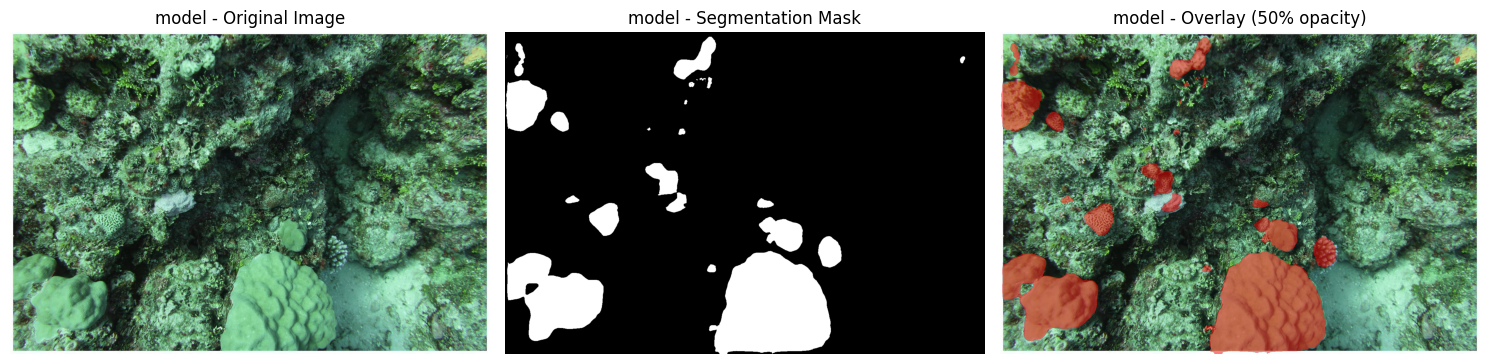

{'dice': 0.9077736735343933, 'iou': 0.8311223387718201, 'precision': 0.868138313293457, 'recall': 0.9512013792991638, 'pixel_accuracy': 0.9765331745147705}


In [10]:
idx = 5
ds_image, ds_golden = dataset[idx]
for model in all_models:
    print(model)
    output = model.segment_image(ds_image, False)
    plot_segmentation_results(*output, "model")
    print(compute_segmentation_metrics(output[1], ds_golden, model.device))

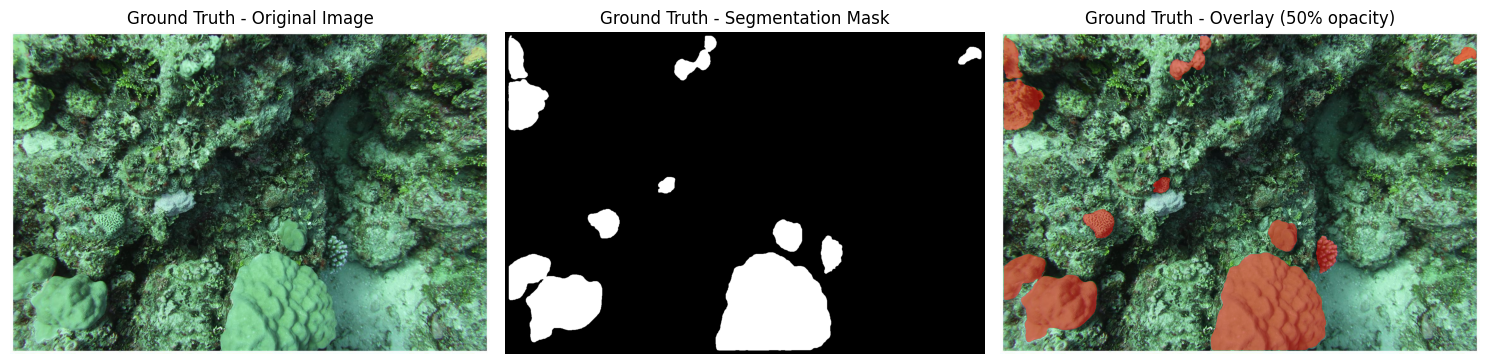

In [6]:
plot_segmentation_results(*dataset[idx], "Ground Truth")